In [1]:
import sys                                                                           
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import fileread as fr
import predefined as pd
import wave_ops as wo
import pFilter

means=np.array([1000, 1031.3367, 1086.8575, 1217.0291, 1041.5563, 1000, 1230.2096, 1188.8999,\
                1000, 1263.1642, 1233.1743, 1056.3289, 1213.4717, 1112.0769, 1049.4534, 1219.0482,\
                1000, 1000, 1077.4932, 1157.1627, 1000, 1163.2235, 1000, 1000,\
                1000, 1027.103, 1111.1212, 1033.5468, 1109.469, 1022.693, 1929.7336, 1000,\
                1000, 1124.478, 1073.1306, 1040.2197, 1100.4457, 1045.0566, 1135.8975, 1073.1854,\
                1000, 1000, 1087.187, 1133.1069, 1005.3494, 1000, 1000, 1000])

def pileup(data,output):
    length=len(data)
    print(length)
    bd,ch=0,0
    for i in range(length):
        bdch=data['board'][i]*8+data['channel'][i]
        output[i,0:3]=pFilter.execute(data['wave'][i],means[bdch])

In [2]:
bd,ch = 4,3 ###64E
data=fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin',length=3500,\
                   row=1000,numwaves=100000)
wo.baseline_restore(data,600)
data=pd.single_pixel(data,bd,ch)
waves=data['wave']

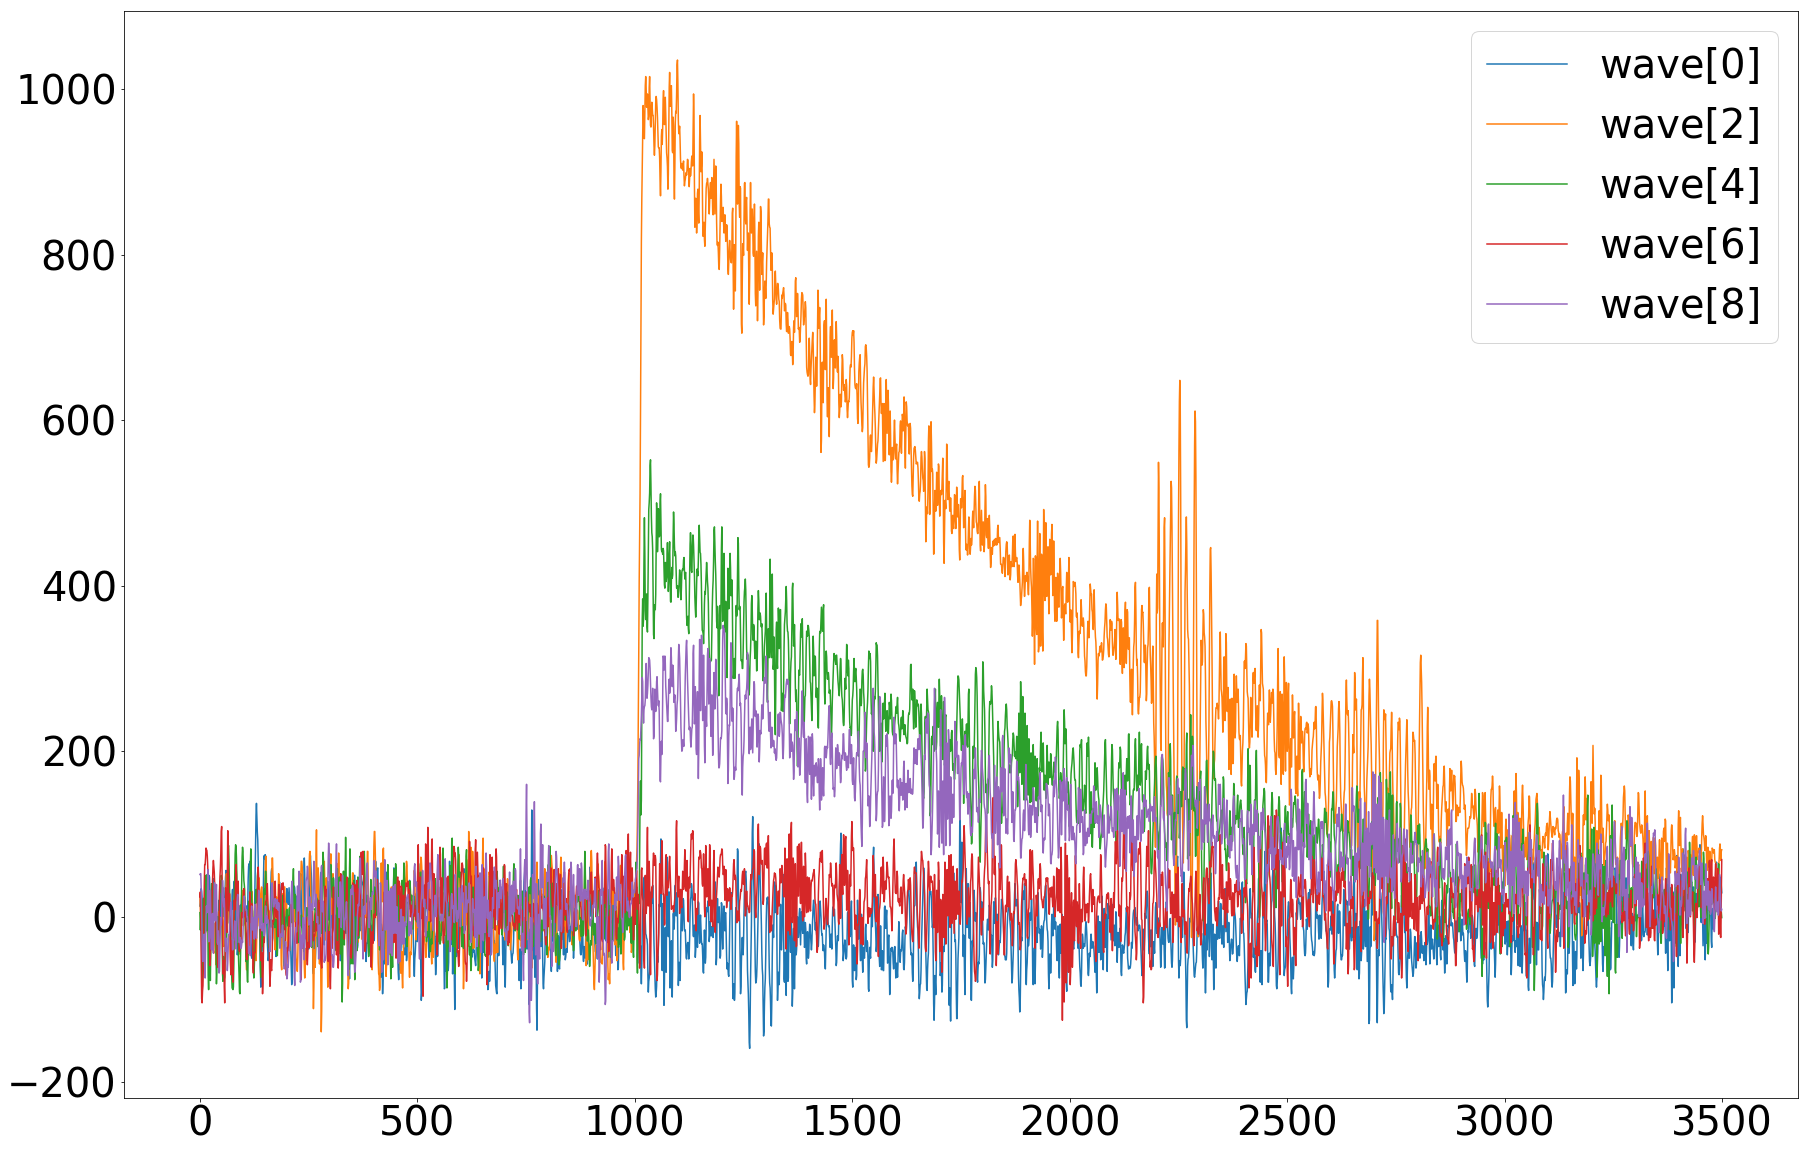

In [3]:
fs=40
t=np.arange(3500)
plt.figure(figsize=(30,20))
for i in range(0,10,2):
    plt.plot(t,waves[i],label='wave[{index:0d}]'.format(index=i))
plt.tick_params(labelsize=fs)
plt.legend(fontsize = fs)
plt.show()

In [4]:
x=np.zeros((len(waves),3))
y=np.zeros((len(waves),3))
for i in range(len(waves)):
    x[i]=pFilter.execute(waves[i],1050.)
pileup(data,y)
tots=np.array((np.sum(x[:,0]),np.sum(x[:,1]),np.sum(x[:,2])))
print (tots, len(waves),tots/len(waves)*100)

29403
[10656.  3298.  1204.] 29403 [36.24119988 11.21654253  4.09482026]


[1. 1. 0.]


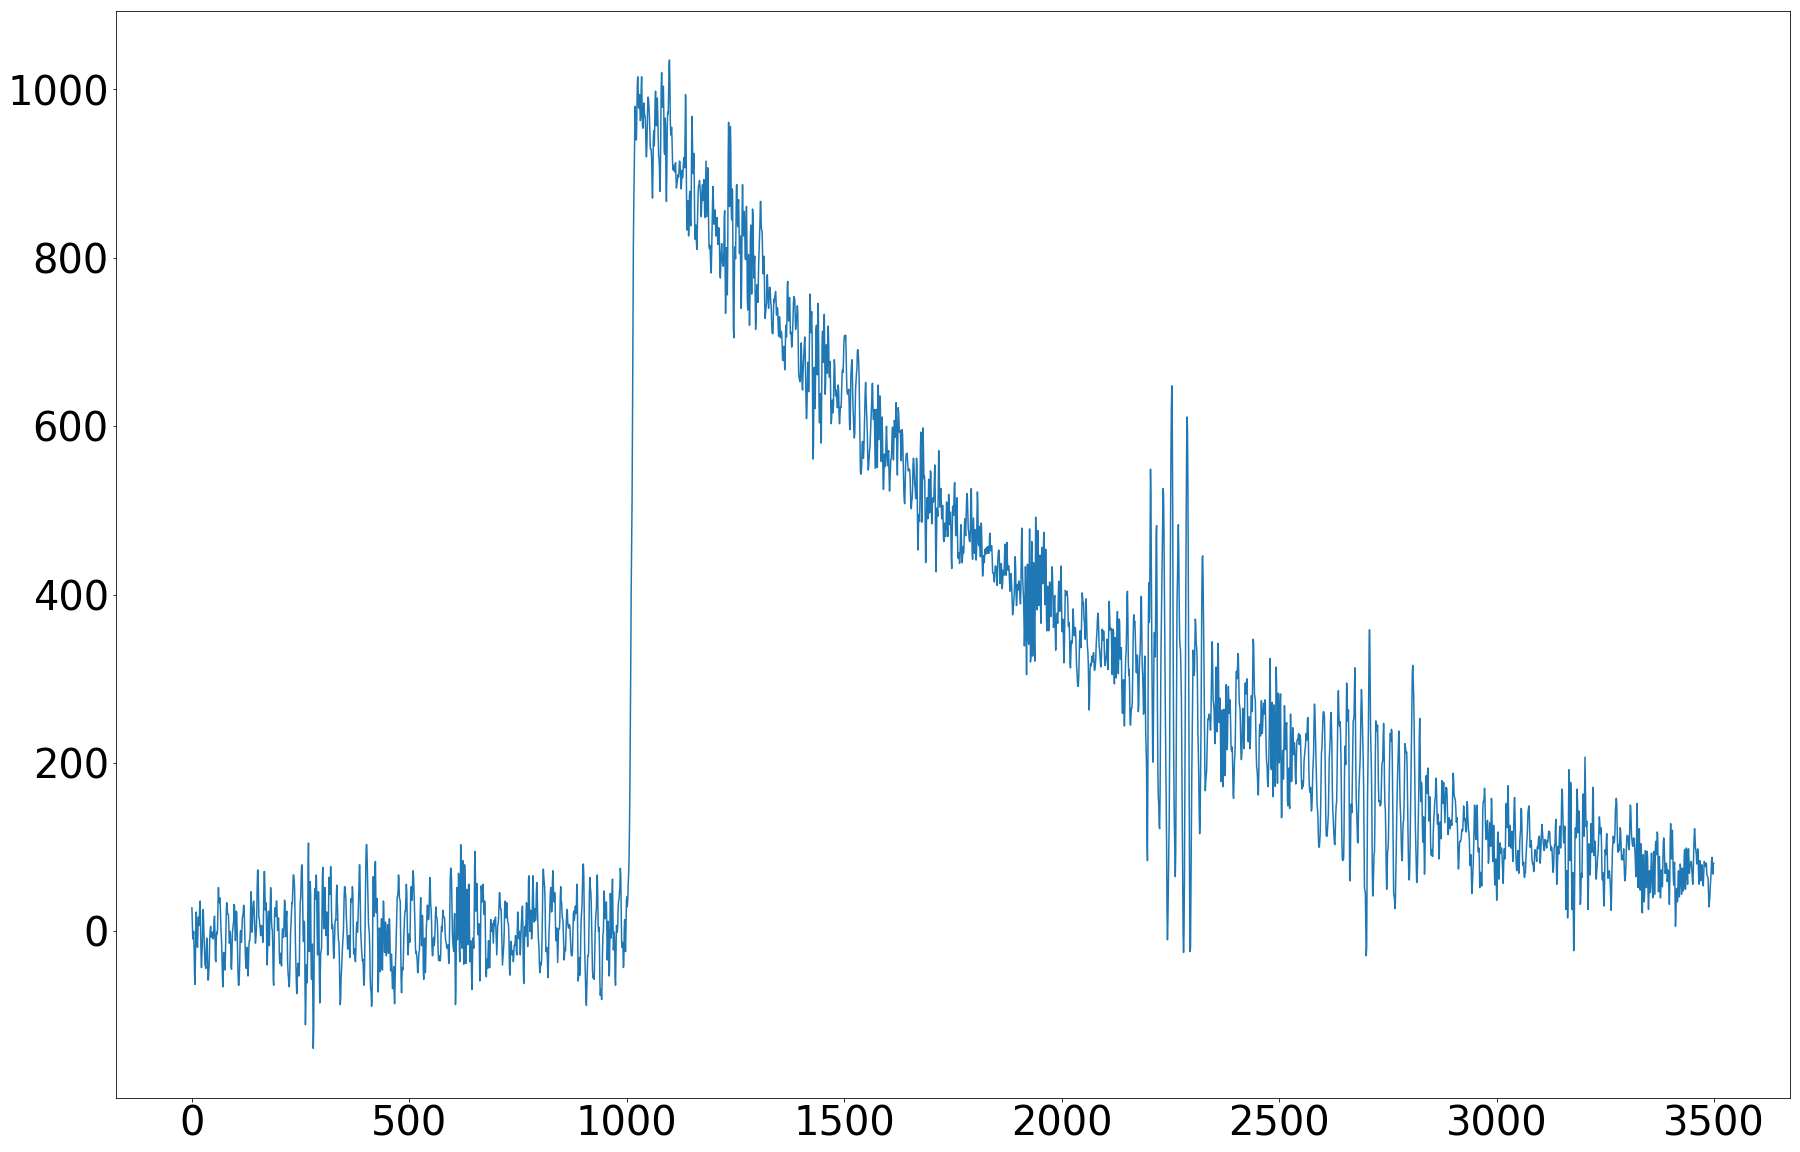

In [5]:
count=0
plt.figure(figsize=(30,20))
for i in range(len(waves)):
    if x[i,0]==1:
        print (x[i,:])
        plt.plot(t,waves[i])
        break
    count+=1
plt.tick_params(labelsize=fs)
plt.show()